# Regression 

Checkpoint -----> [ABIDINE M'hamed Bilal]
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It's a great dataset for evaluating simple regression models.

In [2]:
# id
# date: Date house was sold(String)
# price: Price of the sold house
# bedrooms: Number of Bedrooms
# bathrooms: Number of bathrooms
# sqft_living: Square footage of the living room
# sqrt_log: Square footage of the log
# floors: Total floors in the house
# waterfront: Whether the house has a view a waterfront(1: yes, 0: not)
# view: unknown
# condition: Condition of the house
# grade: construction quality of improvements (ordered categorical variable in the range 1 - 13)
# sqft_above: Square footage of house apart from basement
# sqft_basement: Square footage of the basement
# yr_built: Built year
# yr_renovated: Year when the house was renovated
# zipcode: zipcode of the house
# lat: Latitude coordinate
# long Longitude coordinate
# sqft_living15: Living room area in 2015(implies some renovations)
# sqrt_lot15: Lot area in 2015(implies some renovations)

# data processing
# importing pandas package as pd
import pandas as pd

# data visualization
import seaborn as sns;
import matplotlib.pyplot as plt

# making data frame from csv file 
#df=pd.read_csv('kc_house_data.csv', encoding="iso-8859-1", sep=',')
df=pd.read_csv('titanic-passengers.csv', sep=';')

#df = pd.read_excel (r'C:\Users\Ron\Desktop\Product List.xlsx')
# This dataset will contain the details of a subset of the passengers on board (891 to be exact)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [3]:
Inf=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
#finding no of rows and columns
df.shape

(891, 12)

In [6]:
# Of all the records, there are no missing values, which helps us creating better model.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Data Cleaning

In [7]:
#Let's reduce the dataset by dropping columns that won't be used during the analysis.
df.drop(['id', 'date', 'zipcode', 'view'], axis = 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [8]:
# Data Transformation

# let's create some new variables in our dataset.
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) # Indicate whether there is a basement or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) # 1 if the house has been renovated
df.drop(['sqft_basement', 'yr_renovated'], axis = 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,basement_present,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1955,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1951,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,1933,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,1965,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,1987,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,2009,47.6993,-122.346,1530,1509,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,2014,47.5107,-122.362,1830,7200,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,2009,47.5944,-122.299,1020,2007,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,2004,47.5345,-122.069,1410,1287,0,0


In [171]:
# We remark that bathrooms number are in Float format, we used the Round
import numpy 
k=0
for i in df.bathrooms:
    if isinstance(i, float)== True:
        df.bathrooms[k] = str(i).split('.')[0]
        k+=1
            #type(df.bathrooms[i])==numpy.float64:
            #df.bathrooms[i]=round(i)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,basement_present,renovated
0,221900.0,3,0,1180,5650,1.0,0,3,7,1180,1955,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,1,2570,7242,2.0,0,3,7,2170,1951,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,2,770,10000,1.0,0,3,6,770,1933,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,1965,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,4,1680,8080,1.0,0,3,8,1680,1987,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3.0,0,3,8,1530,2009,47.6993,-122.346,1530,1509,0,0
21609,400000.0,4,2,2310,5813,2.0,0,3,8,2310,2014,47.5107,-122.362,1830,7200,0,0
21610,402101.0,2,0,1020,1350,2.0,0,3,7,1020,2009,47.5944,-122.299,1020,2007,0,0
21611,400000.0,3,2,1600,2388,2.0,0,3,8,1600,2004,47.5345,-122.069,1410,1287,0,0


# Data visualisation

Let’s look at this problem from a builder’s perspective, sometimes it’s important for a builder to see which is the highest selling house type which enables the builder to make house based on that. Here in India , for a good locality a builder opts to make houses which are more than 3 bedrooms which attracts the higher middle class and upper class section of the society.
As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

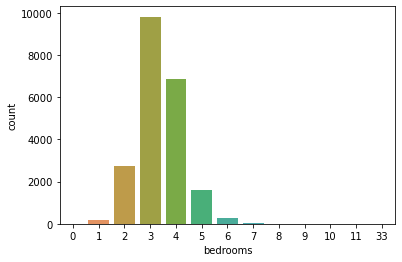

In [9]:
# Finding the count of no of bedrooms.
df['bedrooms'].value_counts()
# bedrooms
sns.countplot(x='bedrooms',data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

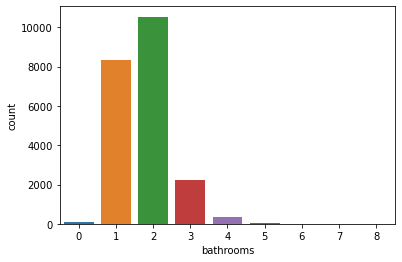

In [172]:
# Finding the count of no of bathrooms.
df['bathrooms'].value_counts()
# bedrooms
sns.countplot(x='bathrooms',data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

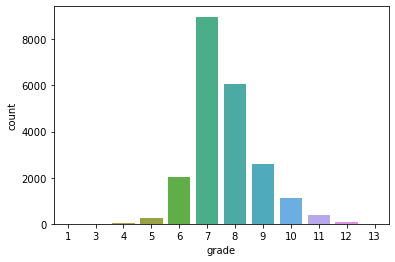

In [177]:
# Finding the count of no of grade.
df['grade'].value_counts()
# bedrooms
sns.countplot(x='grade',data=df)

C:\Users\hphp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

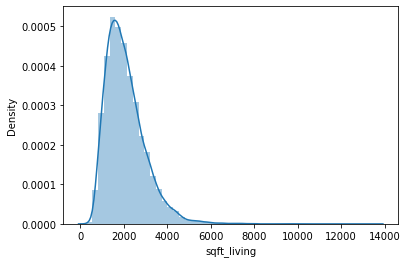

In [175]:
# Finding the count of no of sqft_living.
df['sqft_living'].value_counts()
sns.distplot(df['sqft_living'])

C:\Users\hphp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

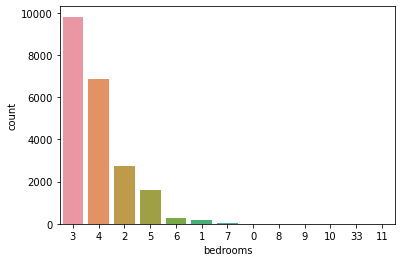

In [176]:
# A countplot is plotted for bedrooms
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_living'}, xlabel='sqft_living', ylabel='price'>

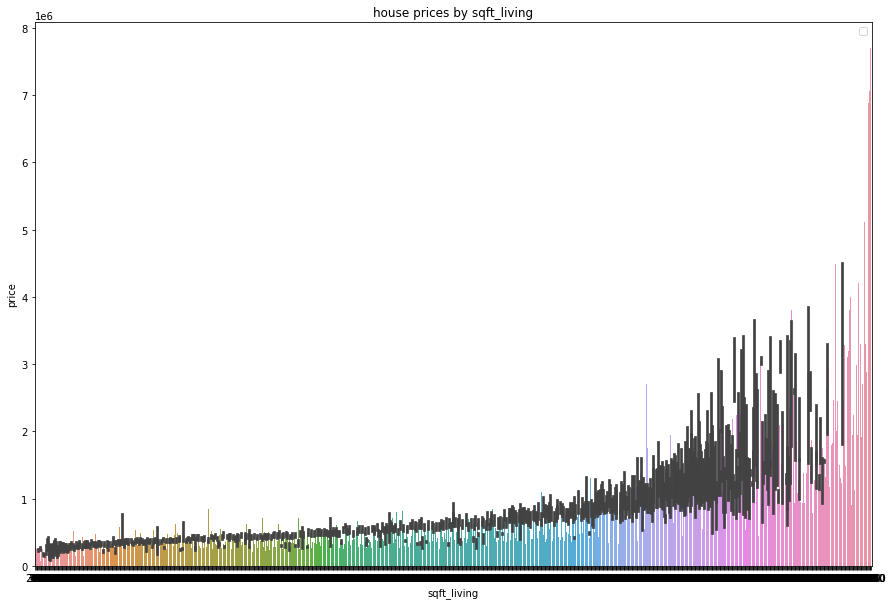

In [190]:
# A barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft.
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x="sqft_living",y="price",data=df)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

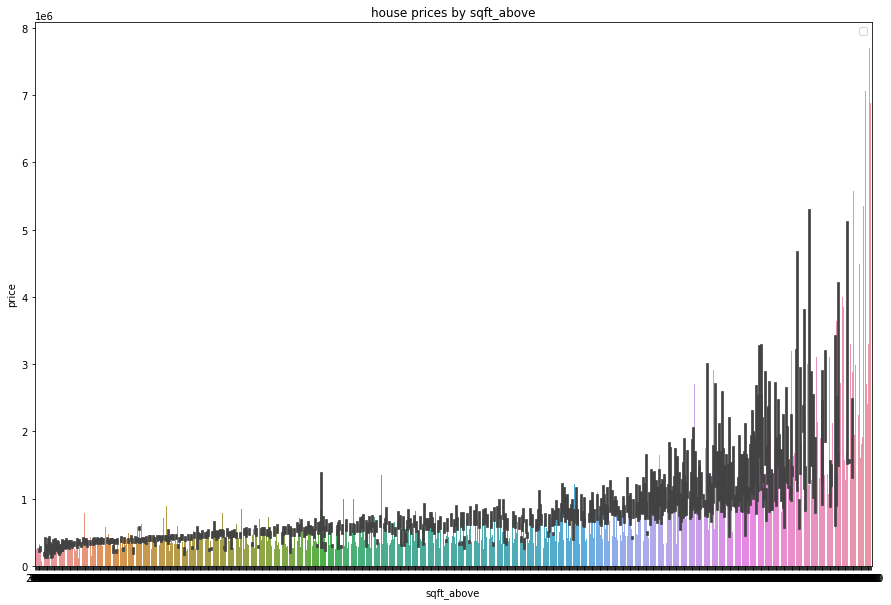

In [191]:
# A barplot is plotted between sqft above and prices to get an overview of how the price changes with sqft.
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x="sqft_above",y="price",data=df)

C:\Users\hphp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

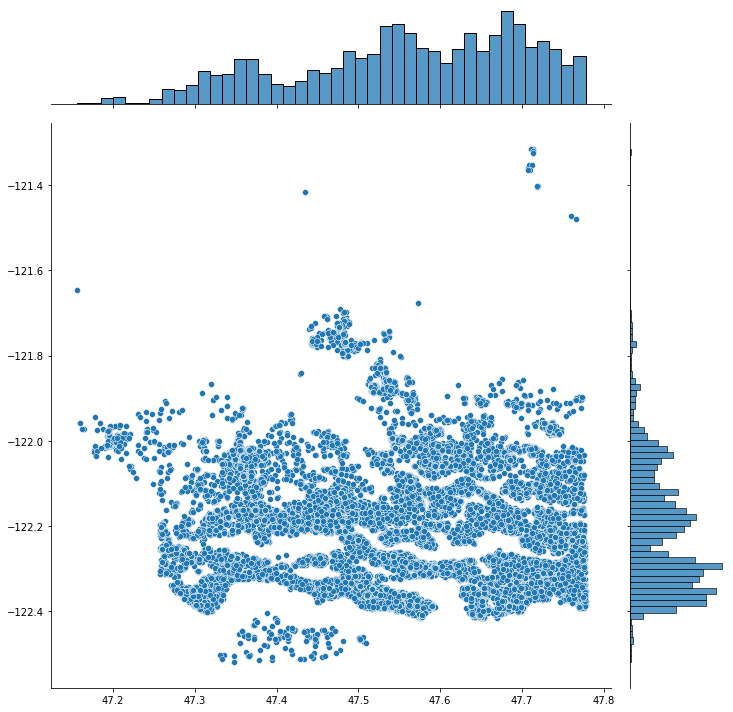

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [12]:
# Joinplot function helps us see the concentration of data and placement of data and can be really useful.
# For latitude between 47.7 and 48.8 there are many houses , which would mean that maybe it’s an ideal location
# isn’t it ? But when we talk about longitude we can see that concentration
# is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

By observing the data, we can know that the price is dependent on various features like sqft_living(which is most dependent feature), grade(second most important feature), sqft_above, etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. 

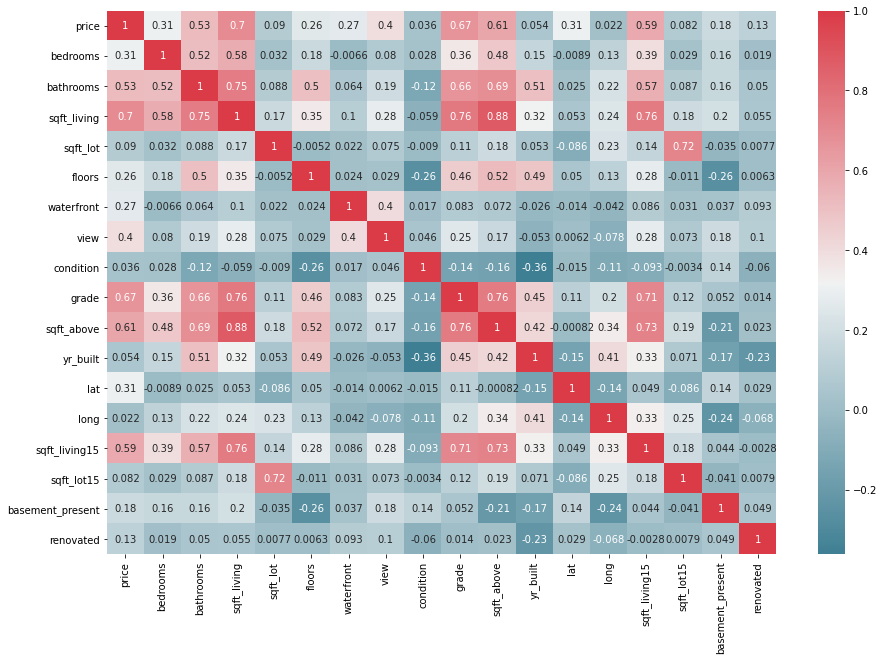

In [26]:
# Making sure we covered all the relations, we plot a correlation between all the features using a heatmap.
# A heatmap is a two-dimensional graphical representation of data where the individual values that are 
#contained in a matrix are represented as colors.

def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable? 

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Here we splitting the data into 80:20 ratio of which train_size is 80%, test_size is 20%. train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state , you will get a different result, this is expected behavior.

In [31]:
 # Simple Linear Regression
# Apply Linear regression in the training set. 
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)


# Measure the performance of linear regression using the testing set. 
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

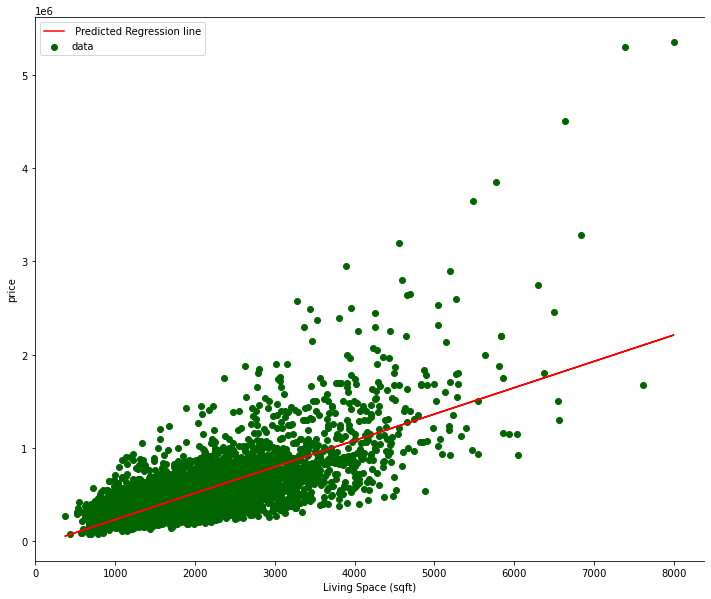

In [28]:
# Plot the linear regression. 
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [32]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144308]
coeeficient [[209225.48270385]]


Multiple Linear Regression

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

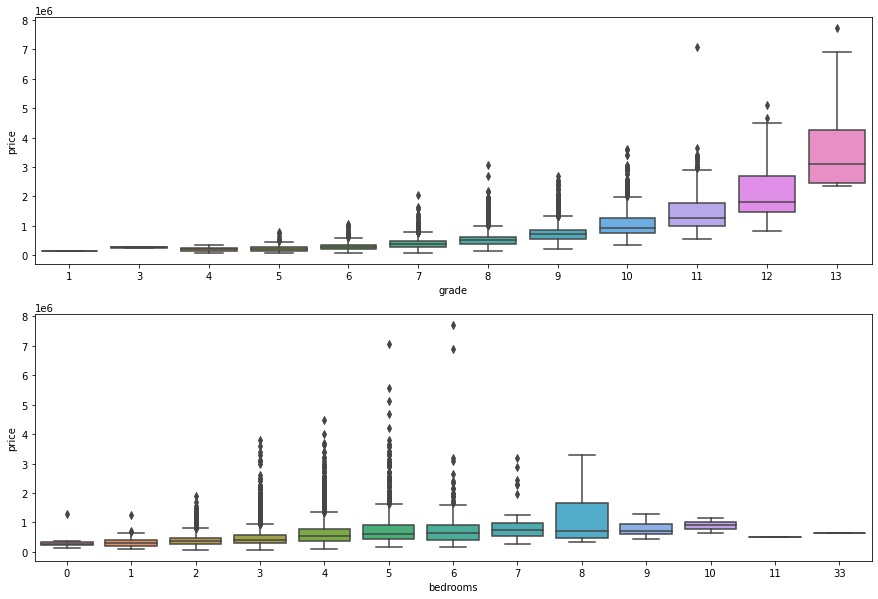

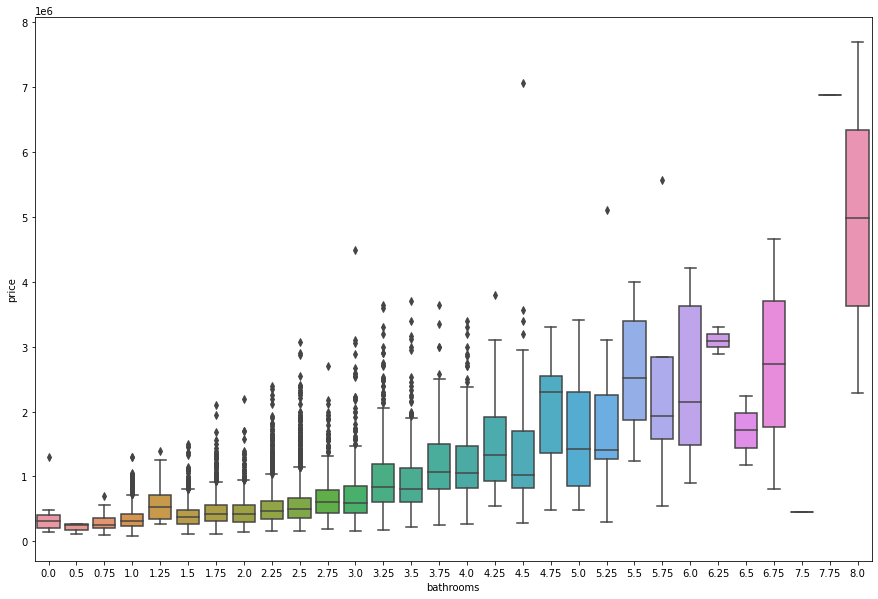

In [9]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’.
These are considered are one feature namely features1. Now the data is fitted into the model
and test_data of features1 are used for prediction. 

In [37]:
features1=['sqft_living', 'grade', 'sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared testing', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 241261.69
R squared training 0.54
R squared testing 0.547
Intercept:  -654101.8370802129
Coefficient: [ 2.39544837e+02  1.09956008e+05 -8.14784638e+01]


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   bedrooms          21613 non-null  int64  
 2   bathrooms         21613 non-null  float64
 3   sqft_living       21613 non-null  int64  
 4   sqft_lot          21613 non-null  int64  
 5   floors            21613 non-null  float64
 6   waterfront        21613 non-null  int64  
 7   condition         21613 non-null  int64  
 8   grade             21613 non-null  int64  
 9   sqft_above        21613 non-null  int64  
 10  yr_built          21613 non-null  int64  
 11  lat               21613 non-null  float64
 12  long              21613 non-null  float64
 13  sqft_living15     21613 non-null  int64  
 14  sqft_lot15        21613 non-null  int64  
 15  basement_present  21613 non-null  int64  
 16  renovated         21613 non-null  int64 

The features we are considering are ‘bedrooms’, ’bathrooms’, ’sqft_living’, ’sqft_lot’,
’floors’, ’waterfront’, ’view’, ’grade’, ’sqft_above’, ’sqft_basement’, ’lat’,’sqft_living15'.
These are considered are one feature namely features2.

In [36]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','grade','sqft_above','basement_present','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features2],train_data['price'])
pred = reg.predict(test_data[features2])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features2], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features2], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  209507.18
R-squared (training)  0.64
R-squared (testing)  0.658
Intercept:  -31861268.843150187
Coefficient: [-3.02712533e+04 -7.12050448e+03  2.22988640e+02 -8.77026978e-02
 -3.06006148e+04  7.84841631e+05  8.69333979e+04 -2.48454465e+01
  3.08283225e+03  6.61025279e+05  1.79392238e+01]


In [ ]:
Conclusion1:
With the features1=['sqft_living', 'grade', 'sqft_above'] ==> R squared testing 0.547  
With the features2 ==> R-squared (testing)  0.658
Therefore the best model used the features2

Polynomial Regression

In [44]:
# or degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features2])
xtest_poly=polyfeat.fit_transform(test_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  179199.28
R-squared (training)  0.751
R-squared (testing)  0.75


In [43]:
# or degree=3, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features2])
xtest_poly=polyfeat.fit_transform(test_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_4')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))


Complex Model_4
Mean Squared Error (MSE)  194281.61
R-squared (training)  0.768
R-squared (testing)  0.706


Conclusion2:
Complex Model_3 gives us R-squared (testing) score of 0.75. From above reports, we can conclude that Polynomial regression 
for degree=2, is best solution.